## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
data = pd.read_csv('CreditData.txt', sep=";", header=None)

In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226
unique,66,7,4,3,152,12,395,6,112,133,216,132,76,48,3
top,64.0,.0,.0,1,.00,P,.00,O,.00,.00,.00,.00,.00,.00,.00
freq,50,820,1185,1107,908,531,206,624,631,709,526,925,1096,1014,902


## Cleaning Data

In [4]:
data.columns = data.iloc[0]

In [5]:
data = data.drop(0)
data=data.reset_index(drop=True)

In [12]:
data.head()

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19,4,0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0
1,41,2,0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0
2,66,0,0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0
3,51,2,0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0
4,65,0,0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
cols = data.columns.drop(["AES", "RES"])
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [8]:
data[cols] = data[cols].astype(float)

In [9]:
cols = data.columns.drop(["SINC","AES","DAINC", "RES","DHVAL","DMORT","DOUTM","DOUTL","DOUTHP","DOUTCC"])

In [10]:
data[cols] = data[cols].astype(int)
data = data.drop(data[data["YOB"] == 99].index)
data=data.reset_index(drop=True)

In [17]:
data.to_csv('finalData.csv')

## Identifying Imbalance in the dataset

In [93]:
print('Good Credit', round(data['BAD'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Bad Credit', round(data['BAD'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Good Credit 73.73 % of the dataset
Bad Credit 26.27 % of the dataset


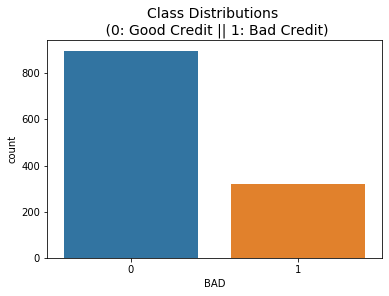

In [94]:
sns.countplot('BAD', data=data)
plt.title('Class Distributions \n (0: Good Credit || 1: Bad Credit)', fontsize=14)
plt.show()

### Random Under-Sampling

In [95]:
print(data['BAD'].value_counts()[0],data['BAD'].value_counts()[1])

898 320


In [96]:
data = data.sample(frac=1)

# amount of bad credit 320 rows.
bad_df = data.loc[data['BAD'] == 1]
good_df = data.loc[data['BAD'] == 0][:320]

normal_distributed_df = pd.concat([bad_df, good_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
146,44,0,0,0,0.0,V,30900.0,O,58928.0,54464.0,840.0,440.0,0.0,80.0,0
910,10,2,0,1,0.0,R,0.0,U,0.0,0.0,0.0,0.0,0.0,0.0,1
1056,49,2,0,1,9620.0,P,4680.0,F,0.0,0.0,0.0,0.0,0.0,0.0,1
238,57,0,0,1,8500.0,V,28200.0,O,46464.0,18464.0,644.0,240.0,520.0,20.0,0
887,52,1,0,1,0.0,P,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: BAD, dtype: float64


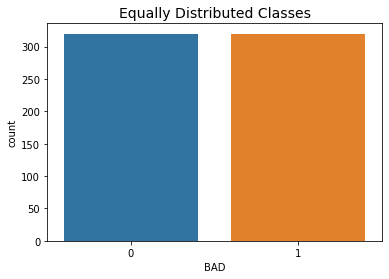

In [97]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['BAD'].value_counts()/len(new_df))

sns.countplot('BAD', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [199]:
new_df.dtypes

0
YOB       int64  
NKID      int64  
DEP       int64  
PHON      int64  
SINC      float64
AES       object 
DAINC     float64
RES       object 
DHVAL     float64
DMORT     float64
DOUTM     float64
DOUTL     float64
DOUTHP    float64
DOUTCC    float64
BAD       int64  
dtype: object

## Exploratory Data Analysis

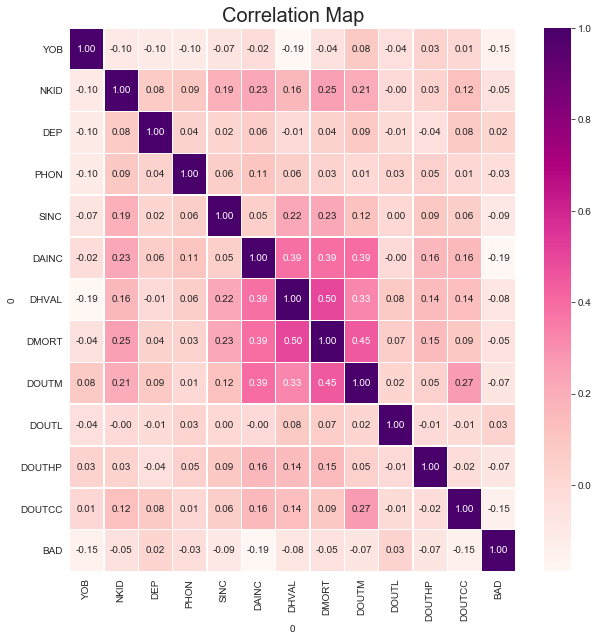

In [144]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax = ax)
plt.title("Correlation Map",fontsize=20)
plt.show()

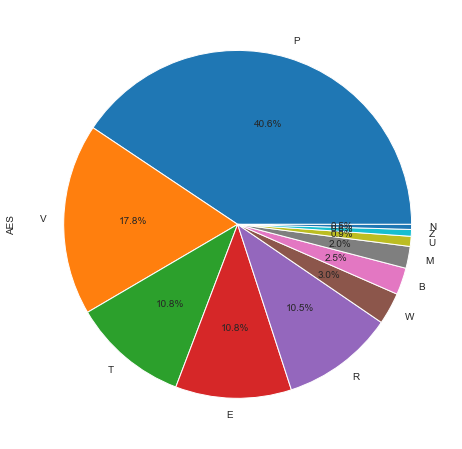

In [189]:
%matplotlib inline
f = plt.subplots(figsize = (15,8))

new_df['AES'].value_counts().plot.pie(autopct='%0.1f%%')
plt.show()

The pie chart above represents the percentage of Customers with different employment status. 40.6% customers belong to Private sector.

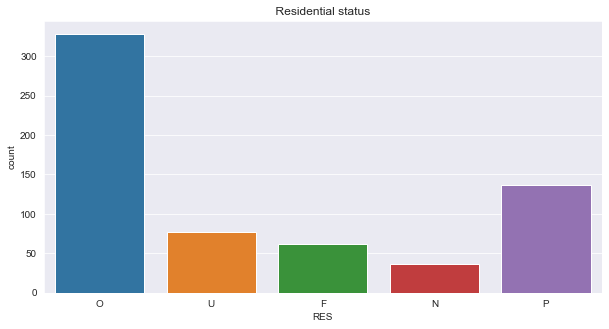

In [192]:
f, axes = plt.subplots(figsize = (10,5))

# Plot [1]
sns.countplot(x = 'RES', data = new_df)
axes.set_title(" Residential status ")

# Show the plot
plt.show()

The plot above represents the number of Customers with different residential status. Maximum Customers are owners.

Text(0.5, 0, 'YOB')

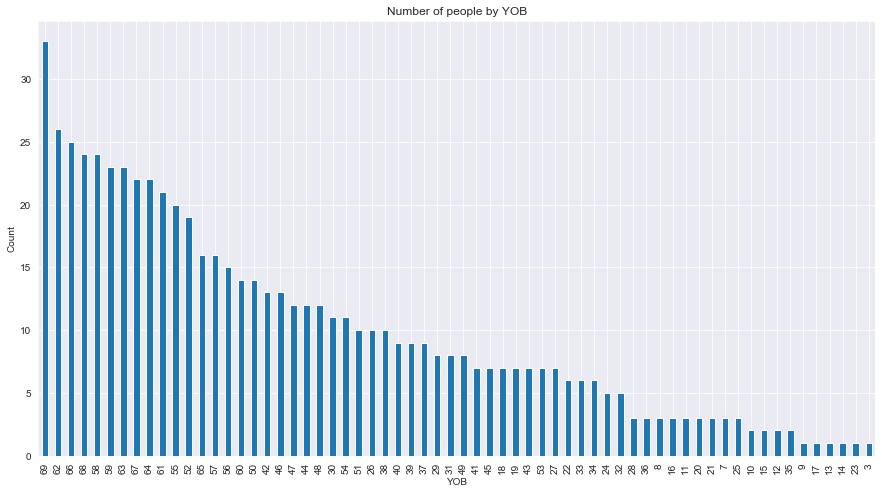

In [152]:
new_df.YOB.value_counts().plot(kind='bar', figsize=(15,8))
plt.title('Number of people by YOB')
plt.ylabel('Count')
plt.xlabel('YOB')

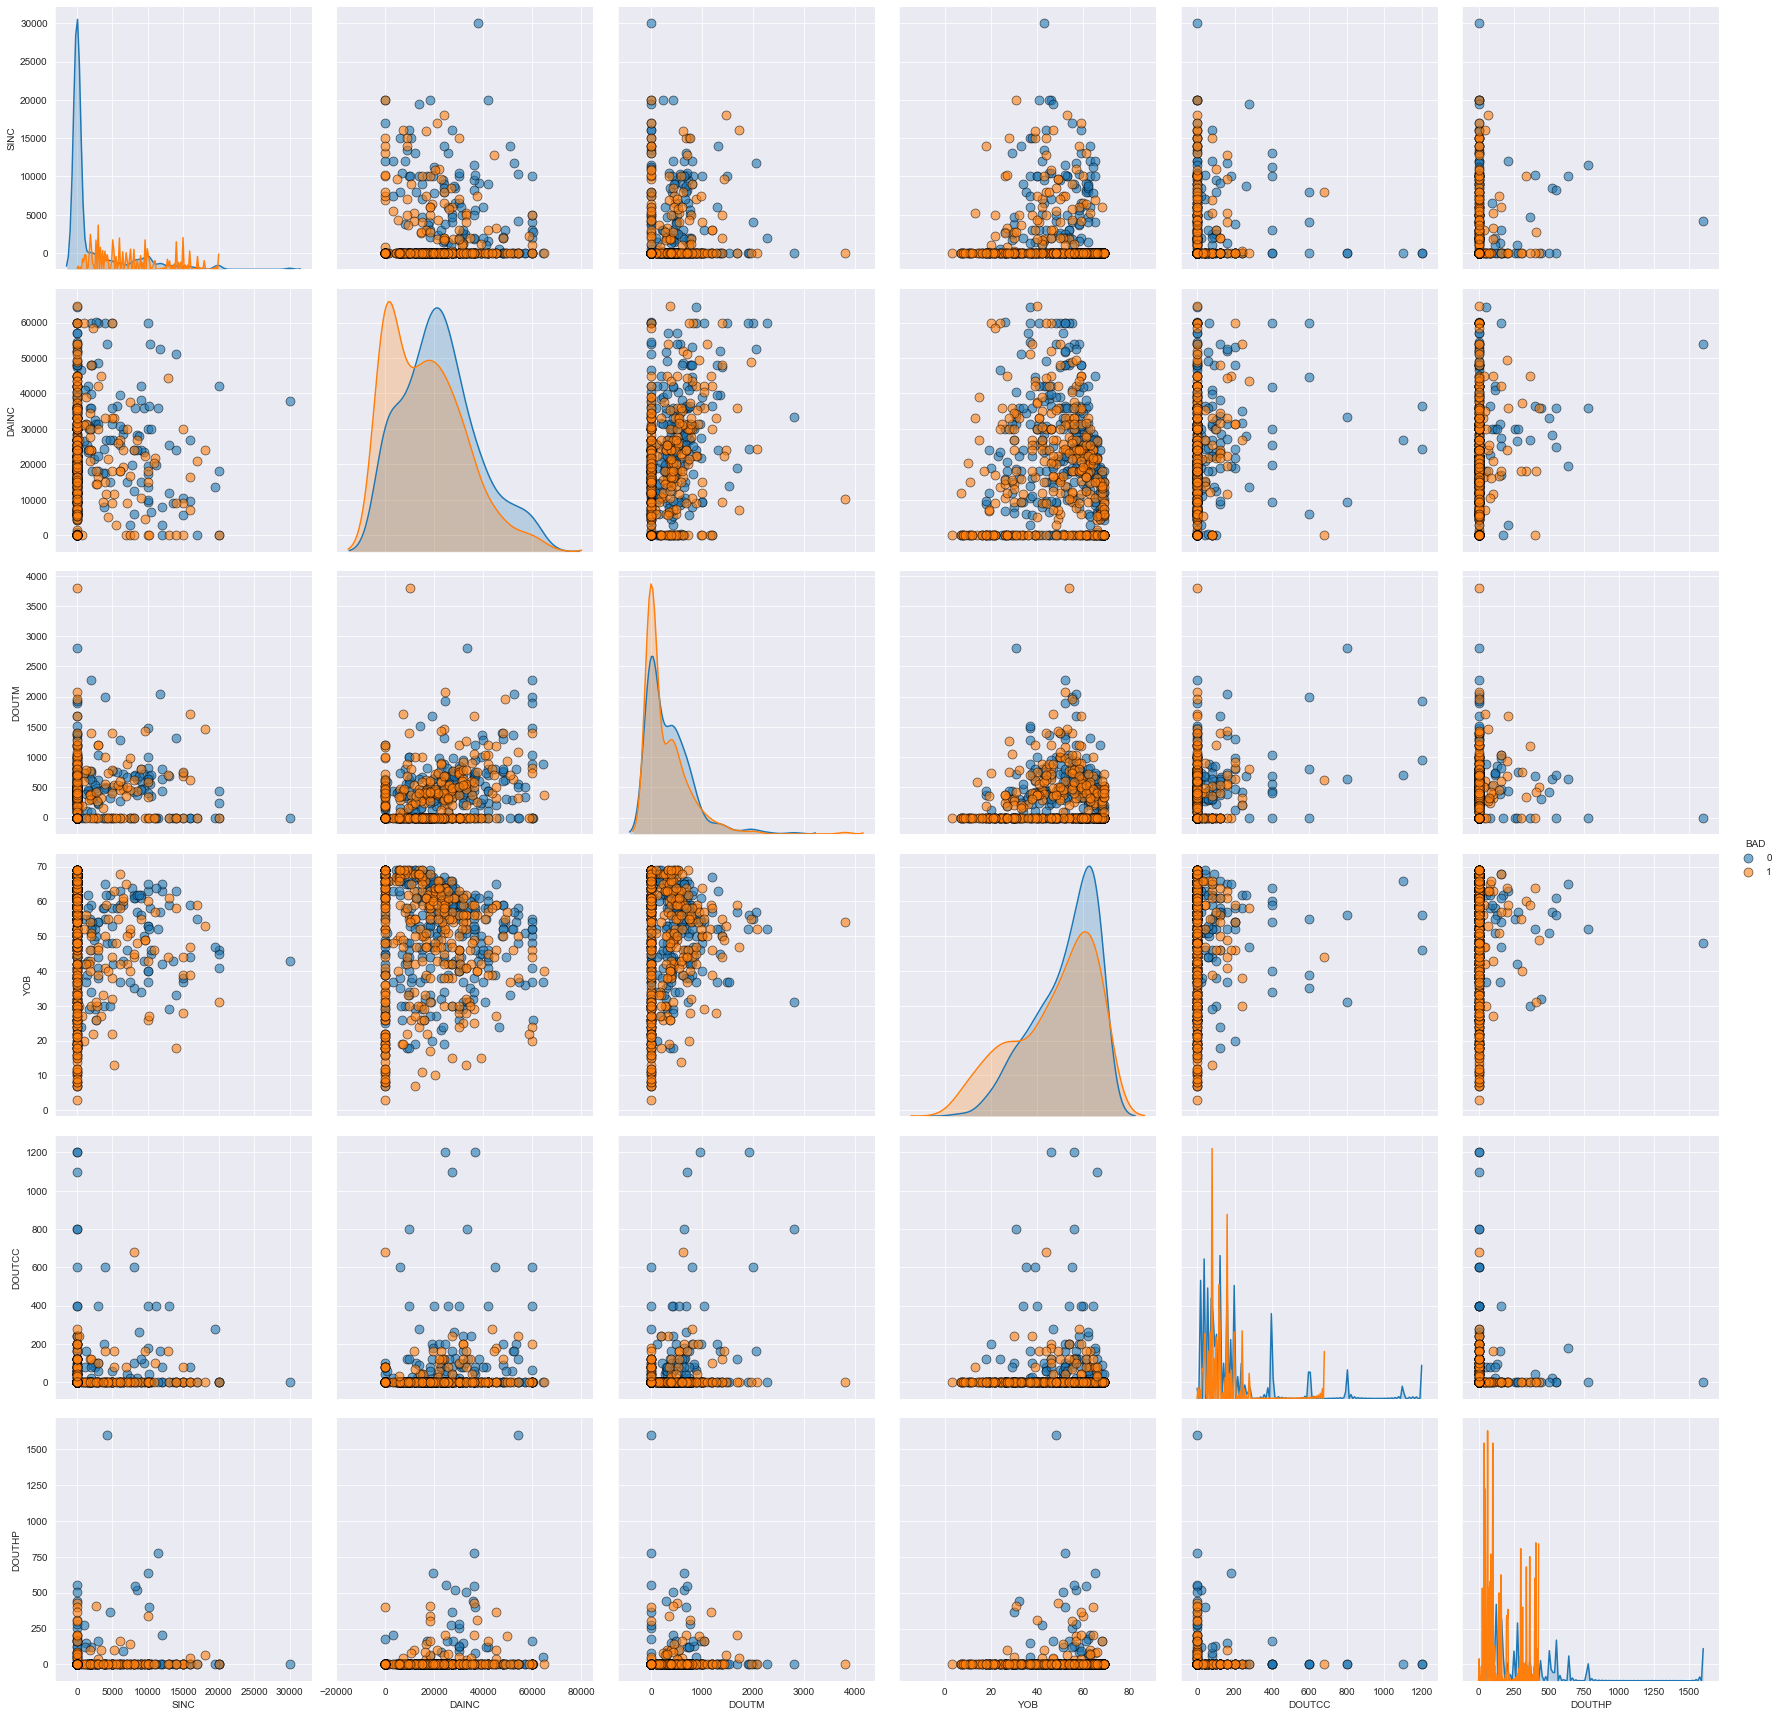

In [178]:
sns.pairplot(new_df,
             vars = ["SINC", "DAINC", "DOUTM","YOB","DOUTCC","DOUTHP"], 
             hue = 'BAD', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

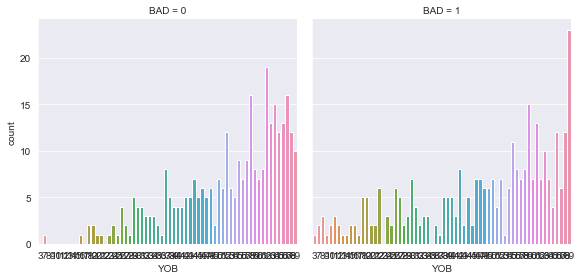

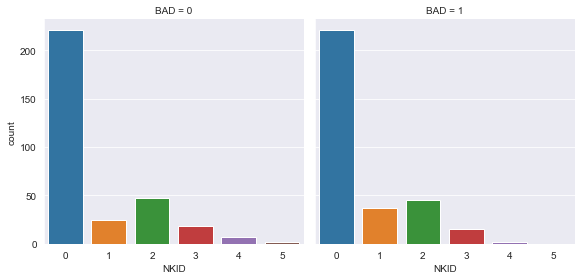

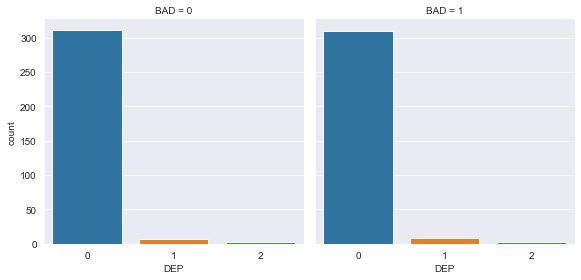

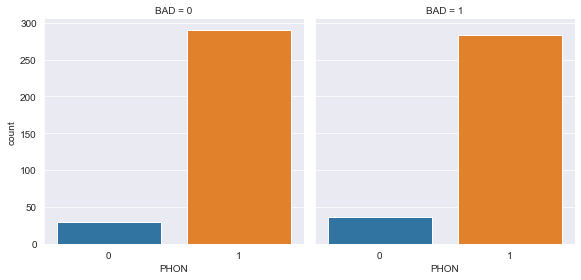

In [157]:
col_list = ['YOB','NKID','DEP','PHON']
for col in col_list:
    plot_cat_data = sns.catplot(x=col, col='BAD', data = new_df, kind='count', height=4)

## Modeling

### Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [331]:
X = data[["SINC", "DAINC", "DOUTM","YOB","DOUTCC","DOUTHP"]]
y = data.BAD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [305]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X = data[["SINC", "DAINC", "DOUTM","YOB","DOUTCC","DOUTHP"]]
# y = data.BAD
# X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.7, random_state=2)

In [332]:
lr = LogisticRegression()

In [333]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [334]:
y_pred = logistic_regression.predict(X_test)

In [335]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

75.68306010928961

In [338]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[277   0]
 [ 89   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       277
           1       0.00      0.00      0.00        89

    accuracy                           0.76       366
   macro avg       0.38      0.50      0.43       366
weighted avg       0.57      0.76      0.65       366

Accuracy: 0.7568306010928961


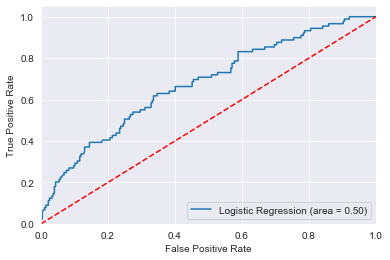

In [339]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SVM

In [342]:
from sklearn import svm

In [343]:
svm = svm.SVC()
svm.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [344]:
y_pred=svm.predict(X_test)

In [345]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[277   0]
 [ 89   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       277
           1       0.00      0.00      0.00        89

    accuracy                           0.76       366
   macro avg       0.38      0.50      0.43       366
weighted avg       0.57      0.76      0.65       366

Accuracy: 0.7568306010928961


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



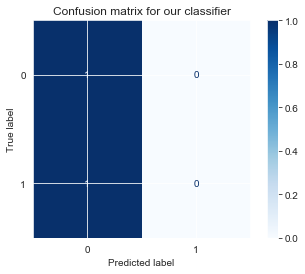

In [346]:
predictions = svm.predict(X_test)

matrix = plot_confusion_matrix(svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

### Random Forest Classifier

In [347]:
from sklearn.ensemble import RandomForestClassifier

In [348]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

In [349]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[247  30]
 [ 60  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       277
           1       0.49      0.33      0.39        89

    accuracy                           0.75       366
   macro avg       0.65      0.61      0.62       366
weighted avg       0.73      0.75      0.74       366

Accuracy: 0.7540983606557377


### Naive Bayes

In [350]:
from sklearn.naive_bayes import GaussianNB

In [351]:
gnb=GaussianNB()

gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)

In [352]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 82 195]
 [ 11  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.30      0.44       277
           1       0.29      0.88      0.43        89

    accuracy                           0.44       366
   macro avg       0.58      0.59      0.44       366
weighted avg       0.74      0.44      0.44       366

Accuracy: 0.4371584699453552
